# 3.4 - İstatistik'e Giriş: Popülasyon, Örneklem ve İlgili Teoremler

## Soru 1:
Bu soruda, merkezi limit teoreminin çalışıp çalışmadığını test edeceksiniz. İki adet normal dağılıma sahip 1000 gözlem içeren değişken üreteceksiniz. Bu değişkenlerin, ortalama ve standart sapmasını kendiniz belirleyebilirsiniz. Yapmanız gereken, ilk değişkeni 50 kere üretin ve her seferinde bu değişkenin ortalamasını alın. İkinci değişkeni ise 1000 kere üretin ve yine her seferinde bu değişkenin ortalamasını alın. Daha sonra, iki değişkenin hesapladığınız ortalamalarının histogramını çizdirin. Hangi değişkenin ortalamalarının dağılımı normal dağılıma daha yakın? Sizce Merkezi Limit Theoremi çalışmış görünüyor mu?

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.animation as animation    # https://matplotlib.org/api/animation_api.html
import seaborn as sns    # https://seaborn.pydata.org/tutorial.html
sns.set()    # https://seaborn.pydata.org/generated/seaborn.set.html

<IPython.core.display.Javascript object>


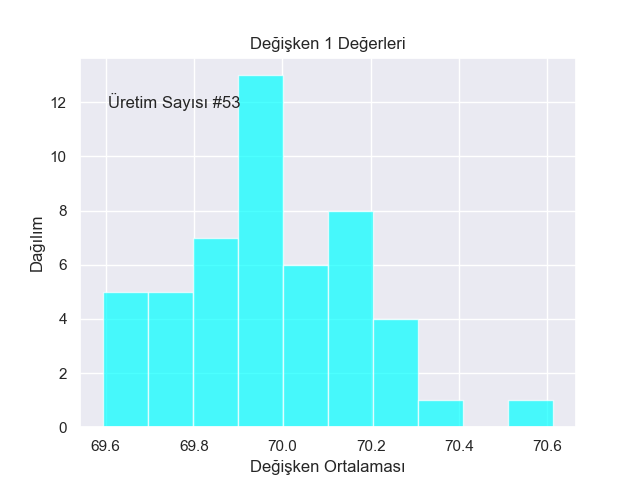

In [6]:
%matplotlib notebook
mean1 = []

for i in range(50):
    var1 = np.random.normal(70, 6, 1000)
    mean1.append(np.average(var1))

def fun1(current):
    plt.cla()
    plt.hist(mean1[0:current], bins=10, color="cyan", alpha=0.7)
    plt.gca().set_title("Değişken 1 Değerleri")
    plt.gca().set_xlabel("Değişken Ortalaması")
    plt.gca().set_ylabel("Dağılım")
    plt.annotate(f"Üretim Sayısı #{current}",xycoords="axes points", xy=(20, 230))

fig = plt.figure()
anime = animation.FuncAnimation(fig, fun1, interval=100)    ## Neden saymaya devam ediyor? Grafik dursa da sayı durmuyor?

<IPython.core.display.Javascript object>


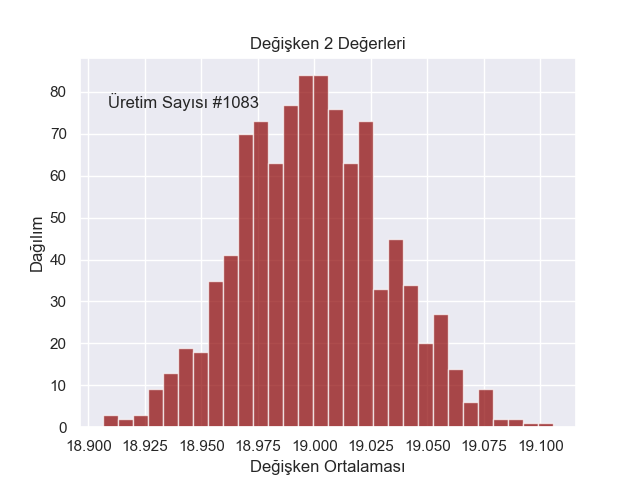

In [7]:
%matplotlib notebook
mean2 = []

for i in range(1000):
    var2 = np.random.normal(19, 1, 1000)
    mean2.append(np.average(var2))

def fun2(current):
    plt.cla()
    plt.hist(mean2[0:current], bins=30, color="darkred", alpha=0.7)
    plt.gca().set_title("Değişken 2 Değerleri")
    plt.gca().set_xlabel("Değişken Ortalaması")
    plt.gca().set_ylabel("Dağılım")
    plt.annotate(f"Üretim Sayısı #{current}", xycoords="axes points", xy=(20, 230))    # https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.annotate.html

fig = plt.figure()
anime = animation.FuncAnimation(fig, fun2, interval=1)    # https://matplotlib.org/api/_as_gen/matplotlib.animation.FuncAnimation.html

**Yorum:** Değişken 1'in grafiğinde 50 ortalama, 2'nin grafiğindeyse 1000 ortalama üretiliyor. İkinci grafikte veri sayısı arttıkça, histogramın normal dağılım grafiğine yaklaştığı görülmektedir. Bu da Merkezi Limit Teoremi'ni doğrulamaktadır.<br>
_(Merkezi Limit Teoremi: Örneklem sayısı arttıkça, örneklem dağılımınin ortalaması aynı popülasyon ortalamasına yaklaşmaktadır.)_

## Soru 2:
İki madeni paramızın olduğunu varsayalım. Bunlardan bir tanesi adil (yani, yeteri kadar deneme yapıldığında yazı veya tura 1/2 olasılığına yaklaşmakta), diğeri ise adil değil ve atıldığında 3/4 olasılığında tura elde edilmektedir. Herhangi biri seçilip, n kere deneme yapıldığında, Büyük Sayılar Yasası uzun vadede gelecek tura sayısını tahmin etmemize izin verir mi? Çok sayıda deneme yapıldığında, hangi paranın seçildiğini bilebilir miyiz?

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.animation as animation    # https://matplotlib.org/api/animation_api.html
import seaborn as sns    # https://seaborn.pydata.org/tutorial.html
sns.set()    # https://seaborn.pydata.org/generated/seaborn.set.html
import time

In [10]:
n = int(input("Kaç deneme yapmak istiyorsunuz: "))

while n<100:
    print("""100'den az sayıda deneme girmeniz pek bir şey ifade etmeyecektir.
    Örneğin 1000 adet deneme, size daha sağlıklı sonuçlar verecektir.""")
    time.sleep(2)
    n = int(input("Kaç adet deneme yapmak istiyorsunuz: "))

Kaç deneme yapmak istiyorsunuz: 50
100'den az sayıda deneme girmeniz pek bir şey ifade etmeyecektir.
    Örneğin 1000 adet deneme, size daha sağlıklı sonuçlar verecektir.
Kaç adet deneme yapmak istiyorsunuz: 2000


In [23]:
def adil_para():
    %matplotlib inline
    # Adil madeni para
    fair_sample = []
    fair_sample_mean = list()
    for i in range(n):
        hit = np.random.binomial(1, 1/2)
        fair_sample.append(hit)
        fair_sample_mean.append(np.mean(fair_sample))

    def fair_plot(sample, sample_mean, sub_plot):
        title_font = {"family":"arial", "color":"darkgreen", "weight":"bold", "size":16}
        axis_font = {"family":"arial", "color":"darkgreen", "weight":"bold", "size":14}
        plt.subplot(sub_plot)
        plt.hlines(y=1/2, label="Adil Oran (0.50)", xmin=0, xmax=sample, colors="orange", linestyle="dashed")    # https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hlines.html
        plt.hlines(y=3/4, label="Hileli Oran (0.75)", xmin=0, xmax=sample, colors="red", linestyle="dotted")    # https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hlines.html
        plt.plot(sample_mean[0:sample], color="blue")

        plt.ylim([0, 1.50])
        plt.title(f"Örneklem Sayısı = {sample}", fontdict=title_font)
        plt.xlabel("Örneklem Sayısı", fontdict=axis_font)
        plt.ylabel("Örneklem Ortalaması", fontdict=axis_font)

        return plt

    plt.figure(figsize=(15,3), dpi=150)
    fair_plot(n//50, fair_sample_mean, 131)
    fair_plot(n//10, fair_sample_mean, 132)
    fair_plot(n, fair_sample_mean, 133)
    
    plt.legend()
    plt.show()

    ## plt.hlines() kısmında "label" girmeme rağmen grafikte gözükmedi. Çünkü plt.legend() koymayı unutmuşum.

In [24]:
def hileli_para():
    %matplotlib inline
    # Hileli madeni para
    false_sample = []
    false_sample_mean = list()
    for i in range(n):
        hit = np.random.binomial(1, 3/4)
        false_sample.append(hit)
        false_sample_mean.append(np.mean(false_sample))

    def false_plot(sample, sample_mean, sub_plot):
        title_font = {"family":"arial", "color":"darkgreen", "weight":"bold", "size":16}
        axis_font = {"family":"arial", "color":"darkgreen", "weight":"bold", "size":14}
        plt.subplot(sub_plot)
        plt.hlines(y=1/2, label="Adil Oran (0.50)", xmin=0, xmax=sample, colors="orange", linestyle="dashed")    # https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hlines.html
        plt.hlines(y=3/4, label="Hileli Oran (0.75)", xmin=0, xmax=sample, colors="red", linestyle="dotted")    # https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hlines.html
        plt.plot(sample_mean[0:sample], color="blue")

        plt.ylim([0, 1.50])
        plt.title(f"Örneklem Sayısı = {sample}", fontdict=title_font)
        plt.xlabel("Örneklem Sayısı", fontdict=axis_font)
        plt.ylabel("Örneklem Ortalaması", fontdict=axis_font)

        return plt

    plt.figure(figsize=(15,3), dpi=150)
    false_plot(n//50, false_sample_mean, 131)
    false_plot(n//10, false_sample_mean, 132)
    false_plot(n, false_sample_mean, 133)
    
    plt.legend()
    plt.show()

    ## plt.hlines() kısmında "label" girmeme rağmen grafikte gözükmedi. Çünkü plt.legend() koymayı unutmuşum.

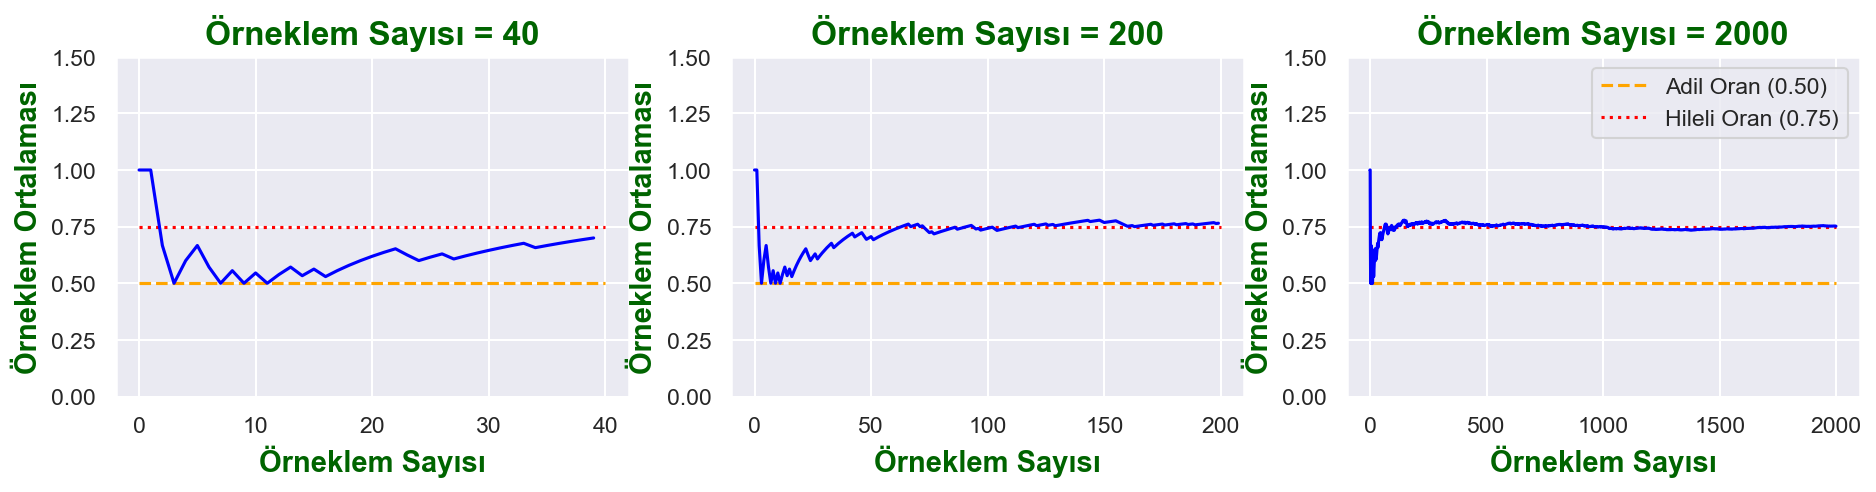

In [25]:
# Attığınız paranın adil olup olmadığı, şansa göre belirlenecektir!
# Hangi paranın denk geldiğini grafiklerden yorumlayabilirsiniz.

your_chance = np.random.randint(low=0, high=2)

if your_chance == 0:
    adil_para()
elif your_chance ==1:
    hileli_para()